# Imports

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
plt.rcParams['figure.dpi'] = 150
plt.style.use('tableau-colorblind10')

# Question 1

In [26]:
xs = np.linspace(-1, 1, 1000)
ys = (xs ** 3) + 1

np.random.seed(42)  # for reproducibility
x_train = np.random.uniform(low=-1, high=1, size=(30,))
y_train = x_train ** 3 + 1 + np.random.normal(loc=0, scale=0.2, size=(30,))

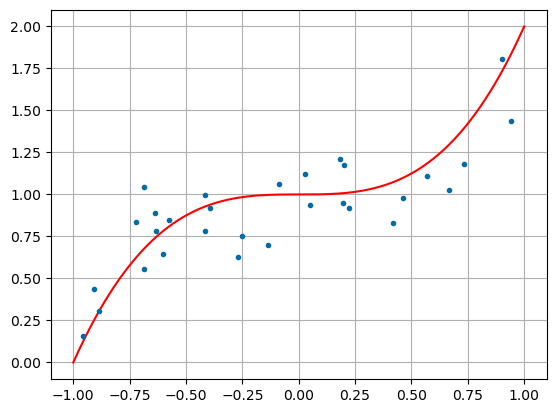

In [27]:
fig = plt.figure()
ax = plt.subplot(1, 1, 1)

# plot the function
plt.plot(xs,ys, 'r-')
# plot the points

plt.plot(x_train,y_train, '.')

# turn on grid
ax.grid('on')

# show the plot
plt.show()

In [28]:
lin_reg = LinearRegression()
lin_reg.fit(x_train.reshape(-1, 1), y_train.reshape(-1, 1))

# Calculate training set error
y_pred = lin_reg.predict(x_train.reshape(-1, 1))
# Error = sum (train vs prediction) ^ 2
# prediction gets flattened so that our matrix is no longer multidimensional,
# and we end with a 1-d array for the error calculation
lin_reg_error = np.sum((y_train - y_pred.flatten()) ** 2)
print(f"Linear regression training set error: {lin_reg_error}")

Linear regression training set error: 1.1906719413883364


Degree: 2, Error: 1.1900458743823887
Degree: 3, Error: 0.7785071777671573
Degree: 4, Error: 0.7771667675739252
Degree: 5, Error: 0.6523224272280277
Degree: 6, Error: 0.6155150204844059
Degree: 7, Error: 0.5163984054963408
Degree: 8, Error: 0.5005007969714308
Degree: 9, Error: 0.4981305267862107
Degree: 10, Error: 0.46767766377343045


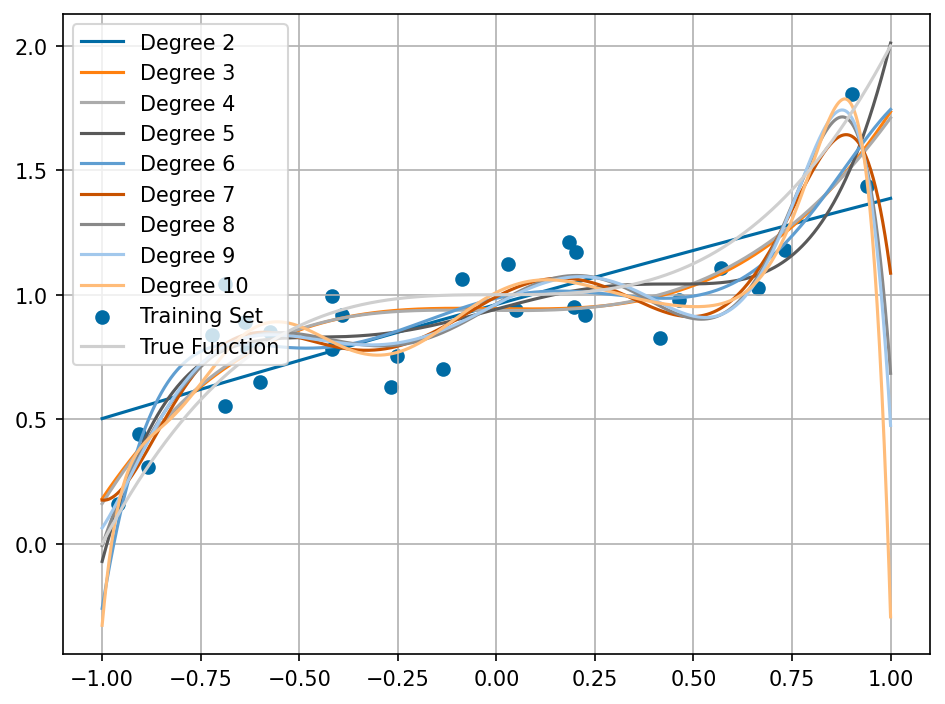

In [30]:
degrees = [2, 3, 4, 5, 6, 7, 8, 9, 10]
x_range = np.linspace(-1, 1, 1000)
# for polynomial power
for degree in degrees:
    # sklearn polyfeatures
    poly_features = PolynomialFeatures(degree=degree)
    x_poly_train = poly_features.fit_transform(x_train.reshape(-1, 1))

    # train a linear regression based on these features
    lin_reg = LinearRegression()
    lin_reg.fit(x_poly_train, y_train.reshape(-1, 1))

    # Calculate training set error
    y_poly_pred = lin_reg.predict(x_poly_train)
    poly_reg_error = np.sum((y_train - y_poly_pred.flatten()) ** 2)
    print(f"Degree: {degree}, Error: {poly_reg_error}")

    # Plot polynomial regression curve
    x_poly_range = poly_features.transform(x_range.reshape(-1, 1))
    y_poly_range = lin_reg.predict(x_poly_range)
    plt.plot(x_range, y_poly_range, label=f"Degree {degree}")

plt.scatter(x_train, y_train, label="Training Set")
plt.plot(x_range, x_range ** 3 + 1, label="True Function")
plt.grid('on')
plt.tight_layout()
plt.legend(loc='upper left', fancybox=True)
plt.show()

Can see that with higher degrees, the model becomes more accurate and our error goes down. However, our prediction gets worse for values larger than 1 with higher degree as the higher degree polynomials diverge to $-\infty$ when degree is higher than 7 due to over fitting

# Question 2

In [7]:
# Load dataset
pokemon_data = pd.read_csv("pokemonregr.csv")
pokemon_data = pokemon_data.dropna()
# Split features and target variable
X = pokemon_data.iloc[:, 0:5]  # select columns 1 to 5 (feature variables: Other stats of Pokémon)
y = pokemon_data.iloc[:, 6]   # select last column (target variable: weight)

# Fit linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [8]:
print("Coefficients:", lin_reg.coef_)

Coefficients: [ 0.24585229  0.68366749 53.4596705  -0.09946152  0.09974726]


The coefficients can be interpreted as the weight of the importance of each feature to the predicted output. The feature with the highest coefficient (i.e. most important for predicting weight) is the third feature, Height. This means that Height has the strongest linear relationship with Weight_kg compared to the other features.

In [9]:
# Normalize features
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

# Fit linear regression model with normalized features
lin_reg_norm = LinearRegression()
lin_reg_norm.fit(X_norm, y)

# Compare coefficients to previous model
print(f"Coefficients (normalized features): {lin_reg_norm.coef_}")

Coefficients (normalized features): [ 7.91720539 21.04757973 57.71689977 -3.19901518  2.79201931]


We can see that the other features have become more important after normalization. E.g. defence has a large increase in its association with weight, however, height is still the most important determiner for weight

# Question 3

In [10]:
#load the data
data = pd.read_csv("W3classif.csv")

# Prepare the data
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Fit the logistic regression model
model = LogisticRegression()
model.fit(X.values, y.values)

# Print the parameter values
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Intercept: [-4.67108087]
Coefficients: [[1.76092381 1.76042935]]


In [11]:
# Predict the probability of y'=1 given x'=(1.1,1.1)
x_test = [[1.1, 1.1]]
y_pred_proba = model.predict_proba(x_test)

# Print the predicted probability
print(f"P(y'=1 | x') = {y_pred_proba[0][1]}")

P(y'=1 | x') = 0.3105407641632554


This gives us that there is a 30% chance that (1.1, 1.1) is an element of the class 1, and thus a 70% chance that it is in 0

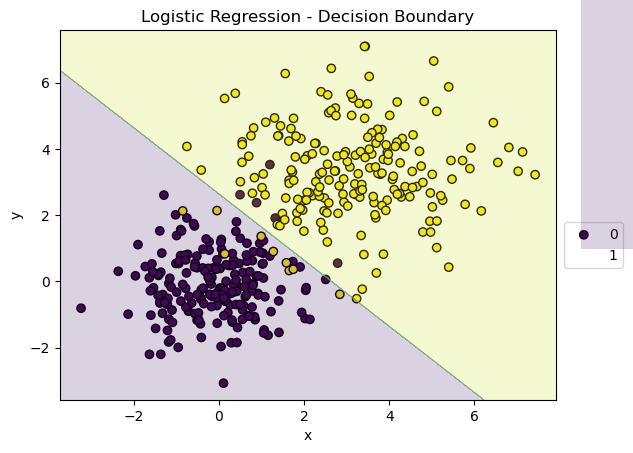

In [25]:
# Define the mesh grid with distance between lines of 0.02
h = 0.02
# use a padding of 0.5 for our min and max values
x_min, x_max = X.iloc[:, 0].min() - 0.5, X.iloc[:, 0].max() + 0.5
y_min, y_max = X.iloc[:, 1].min() - 0.5, X.iloc[:, 1].max() + 0.5
# generate mesh grid from these min and max values, as well as our spacing h
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# use the model to predict the class while using their positions in the x y plane
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the data with the discriminant function and decision boundary
plt.figure()
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolors='k')
plt.contourf(xx, yy, Z, alpha=0.2)
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['0', '1'], fancybox=True, loc='best', bbox_to_anchor=(1.15, 0.5))
plt.title('Logistic Regression - Decision Boundary')
plt.show()